In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pylab as pl
%matplotlib inline
import scipy as sp
import scipy.sparse as sps
from sklearn.cluster import KMeans
from sklearn.cross_validation import KFold

In [2]:
def generateTwoGaussian():
    mean1 = [-2, -2]
    cov1 = [[1, 0], [0, 1]]  # diagonal covariance
    mean2 = [2,2]
    cov2 = [[1, 0], [0, 1]]  # diagonal covariance

    # data
    X = np.zeros((200,2))
    y = np.zeros(200,dtype=int)
    X[:100] = np.random.multivariate_normal(mean1, cov1, 100)
    X[100:] = np.random.multivariate_normal(mean2, cov2, 100)
    y[100:] = np.ones(100)
    return X,y,"Gaussian"

def generateXOR():
    mean1 = [-2, -2]
    cov1 = [[1, 0], [0, 1]]  # diagonal covariance
    mean2 = [2,2]
    cov2 = [[1, 0], [0, 1]]  # diagonal covariance

    # data
    X = np.zeros((400,2))
    y = np.zeros(400,dtype=int)
    X[:100] = np.random.multivariate_normal(mean1, cov1, 100)
    X[100:200] = np.random.multivariate_normal(mean2, cov2, 100)
    
    
    mean3 = [2, -2]
    cov3 = [[1, 0], [0, 1]]  # diagonal covariance
    mean4 = [-2, 2]
    cov4 = [[1, 0], [0, 1]]  # diagonal covariance

    X[200:300] = np.random.multivariate_normal(mean3, cov3, 100)
    X[300:] = np.random.multivariate_normal(mean4, cov4, 100)
    y[200:] = np.ones(200)
    
    return X,y,"XOR"

def generateTwoParabola():
    x1 = np.linspace(-10, 10, 40)
    y1 = .22*x1**2 + .024*x1 + .04  

    x2 = np.linspace(0, 20, 40)
    y2 = -.2*(x2-10)**2 - .024*(x2-10) + 35

    size = x1.shape[0]
    EACH = 10
    X = np.zeros((2*size*EACH,2))
    y = np.zeros(2*size*EACH,dtype=int)
    y[size*EACH:] = np.ones(size*EACH)

    cov = [[1, 0], [0, 1]]  # diagonal covariance
    for i in range(size):
        X[i*EACH:(i+1)*EACH] = np.random.multivariate_normal([x1[i],y1[i]], cov, EACH)
        X[(i+size)*EACH:(i+size+1)*EACH] = np.random.multivariate_normal([x2[i],y2[i]], cov, EACH)
    return X,y,"Parabolas"

In [3]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
def plotData(X,y,dataName):
    num = len(np.unique(sorted(y)))
    for i in range(num):
        plt.plot(X[:,0][y==i], X[:,1][y==i], colors[i%8]+'o')
    plt.axis('equal')
#     plt.savefig(dataName+'.jpg')
    plt.show()




def Prototyping(X,numP):
    kmeans = KMeans(init='k-means++',n_clusters=numP)
    kmeans.fit(X)

    centers = kmeans.cluster_centers_
#     plotData(X,kmeans.labels_,"Two Gaussian")
    
    return centers
def distance2(p1,p2):
    ans = 0
    for i in xrange(p1.shape[0]):
        ans += (p1[i] - p2[i]) ** 2
    return ans
def similarity(p1,p2,sigma):
    return np.exp((-distance2(p1,p2))/(2*(sigma**2)))

In [22]:
def bipartiteUnsupervised(X,centers,sigma):
    numS = X.shape[0]
    numP = centers.shape[0]
#     print numS,numP
    N = numS + numP
    W = sps.lil_matrix((N,N))
    for i in xrange(numS):
        for j in xrange(numP):
            W[i,numS+j] = similarity(X[i],centers[j],sigma)
            W[numS+j,i] = W[i,numS+j]
    W = sps.csr_matrix(W)
    d = np.array(W.sum(axis=0))
    D = sps.diags(d,[0])
    L = D - W
    return W,D,L

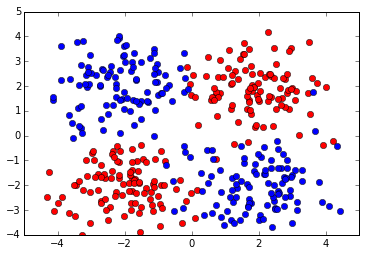

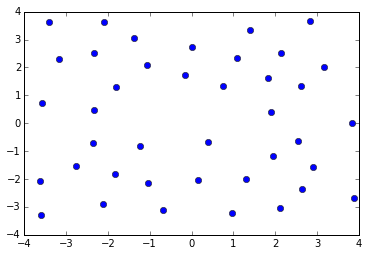

In [5]:
#supervisedBipartite10Fold
X,y,name = generateXOR()
plt.plot(X[:,0][y==0],X[:,1][y==0],'ro')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bo')
plt.show()

numP = 40
centers = Prototyping(X,numP)
plt.plot(centers[:,0],centers[:,1],'bo')

400 40


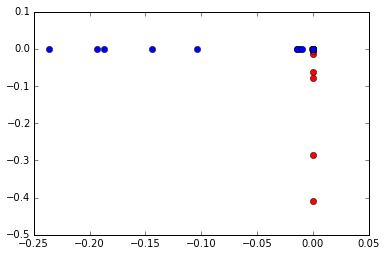

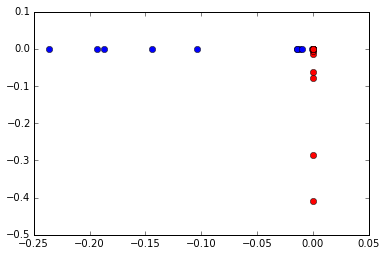

In [6]:
sigma = .1
numS = X.shape[0]

W,D,L = bipartiteUnsupervised(X,centers,sigma)
vals, vecs = sps.linalg.eigs(L, k=3)
vals = vals.real
vecs = vecs.real[:numS]
plt.plot(vecs[:,0][y==1],vecs[:,1][y==1],'ro')
plt.plot(vecs[:,0][y==0],vecs[:,1][y==0],'bo')
plt.show()
plt.plot(vecs[:,0][y==0],vecs[:,1][y==0],'bo')
plt.plot(vecs[:,0][y==1],vecs[:,1][y==1],'ro')
plt.show()

======================================================================= 0.01
400 40
Factor is exactly singular
======================================================================= 0.02
400 40
Factor is exactly singular
======================================================================= 0.05
400 40
------------------------------------------1 2---------------


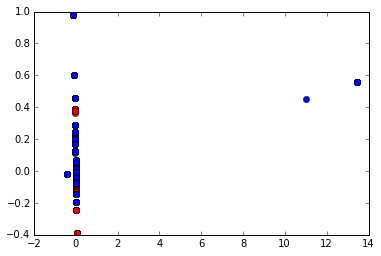

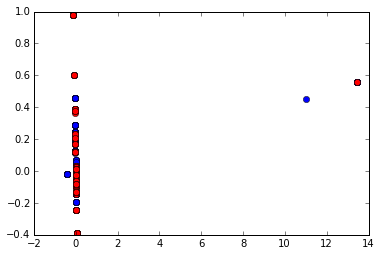

------------------------------------------3 4---------------


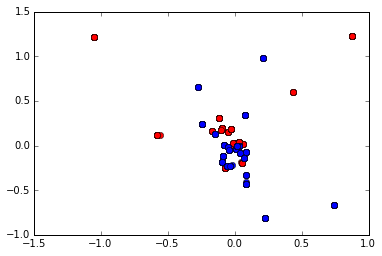

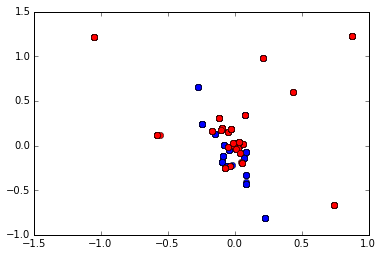

------------------------------------------5 6---------------


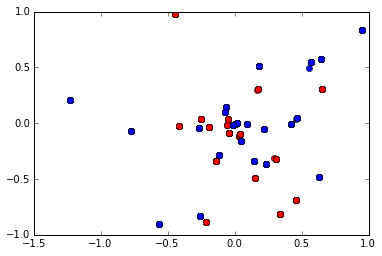

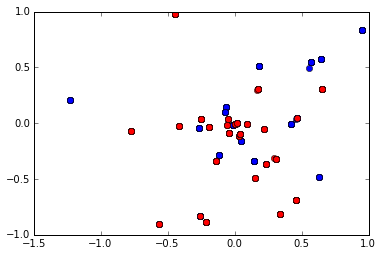

======================================================================= 0.1
400 40
ARPACK error -1: No convergence (4401 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
======================================================================= 0.2
400 40
------------------------------------------1 2---------------


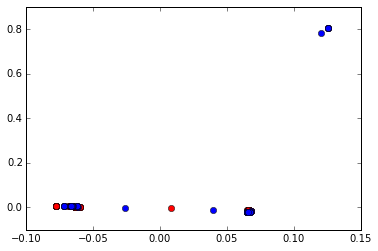

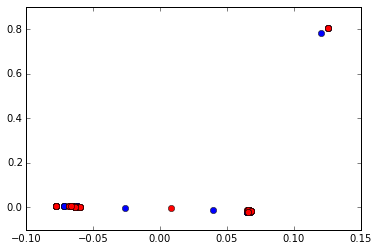

------------------------------------------3 4---------------


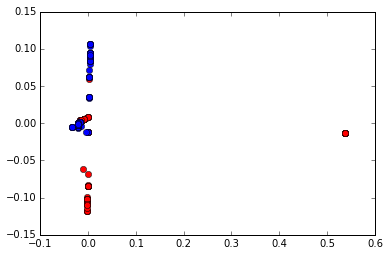

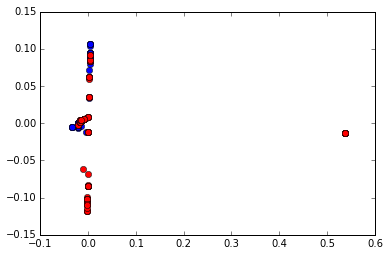

------------------------------------------5 6---------------


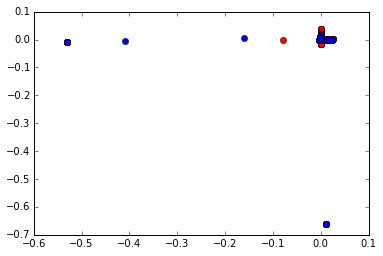

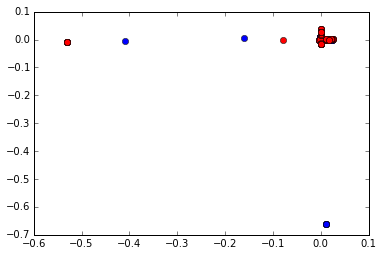

======================================================================= 0.5
400 40
------------------------------------------1 2---------------


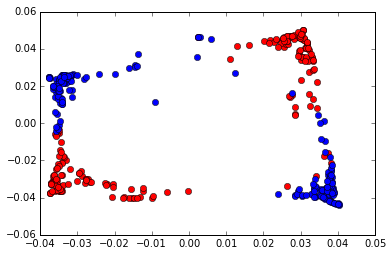

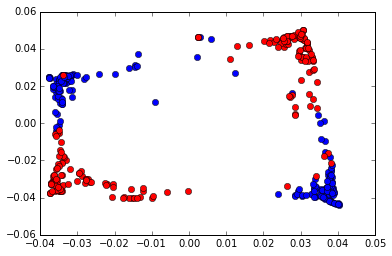

------------------------------------------3 4---------------


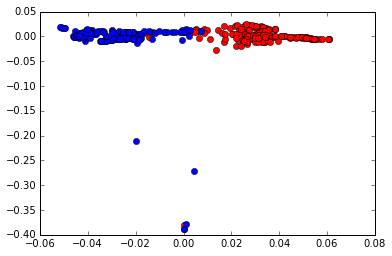

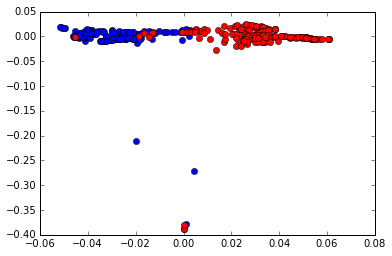

------------------------------------------5 6---------------


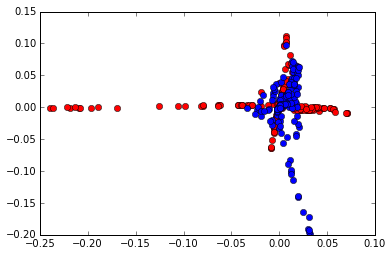

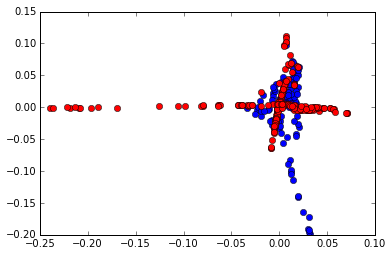

======================================================================= 1
400 40
------------------------------------------1 2---------------


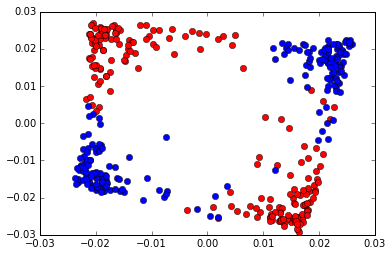

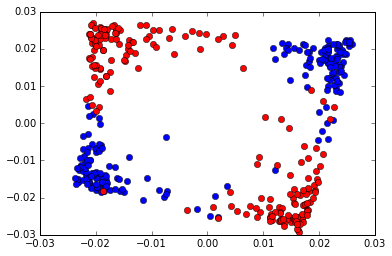

------------------------------------------3 4---------------


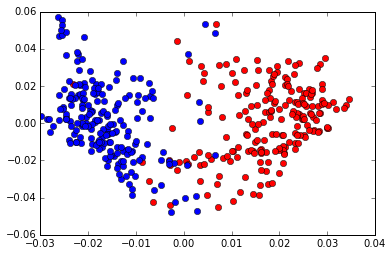

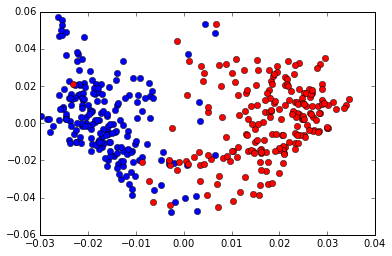

------------------------------------------5 6---------------


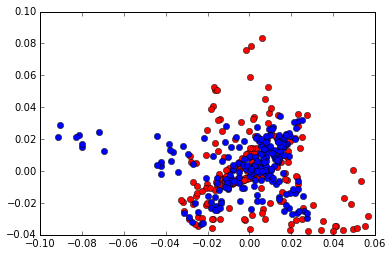

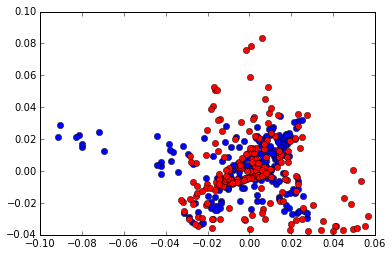

======================================================================= 2
400 40
------------------------------------------1 2---------------


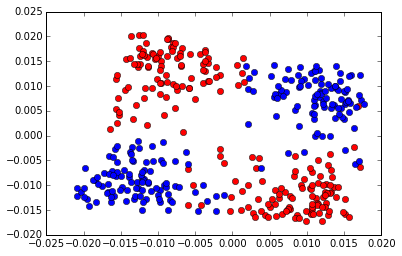

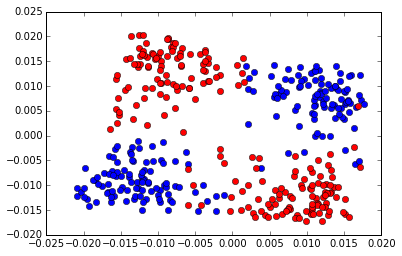

------------------------------------------3 4---------------


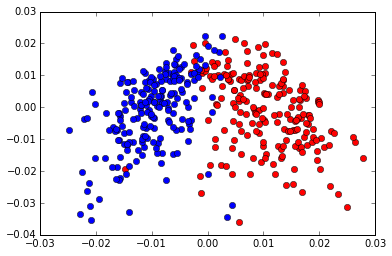

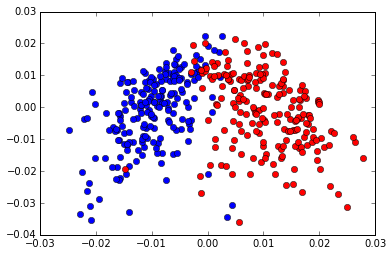

------------------------------------------5 6---------------


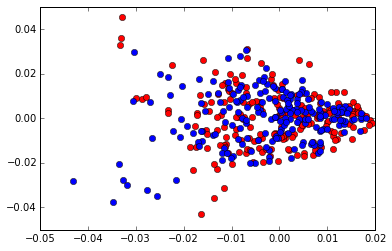

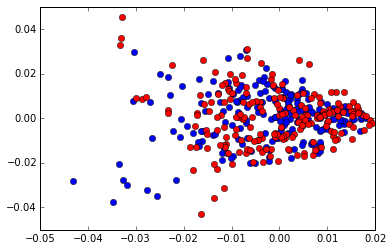

======================================================================= 5
400 40
------------------------------------------1 2---------------


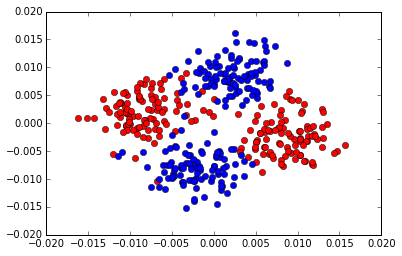

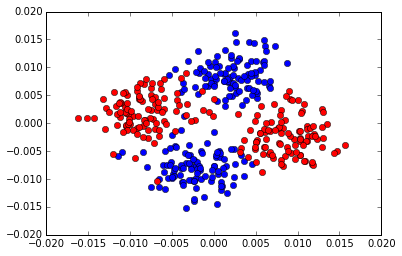

------------------------------------------3 4---------------


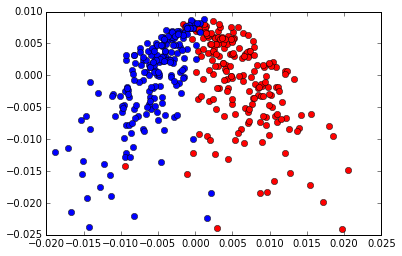

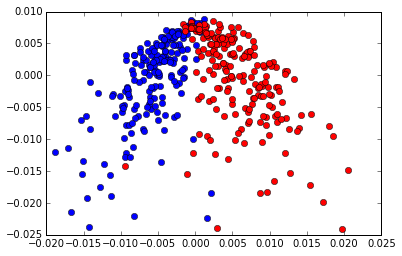

------------------------------------------5 6---------------


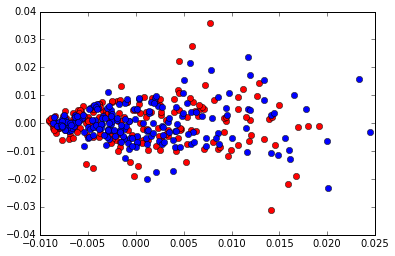

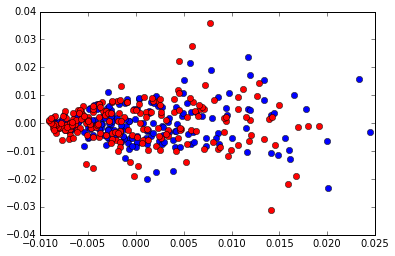

======================================================================= 10
400 40
------------------------------------------1 2---------------


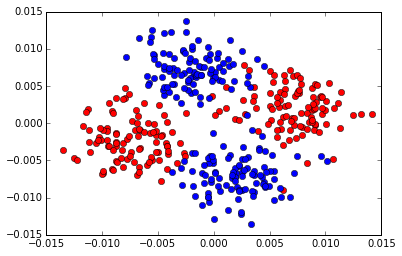

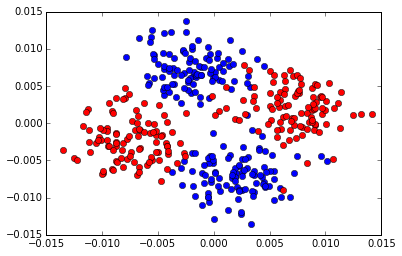

------------------------------------------3 4---------------


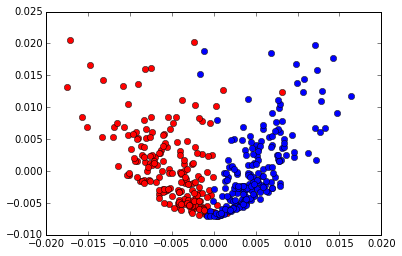

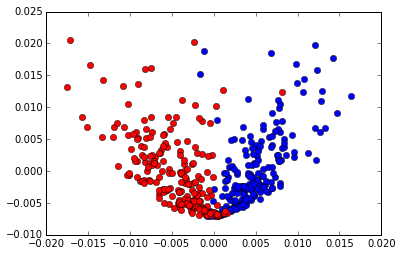

------------------------------------------5 6---------------


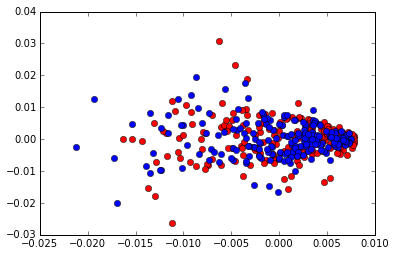

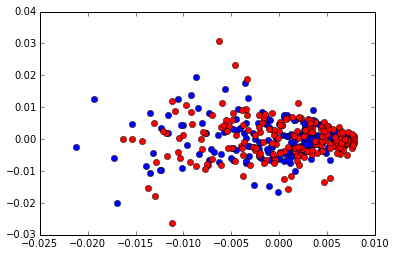

======================================================================= 15
400 40
------------------------------------------1 2---------------


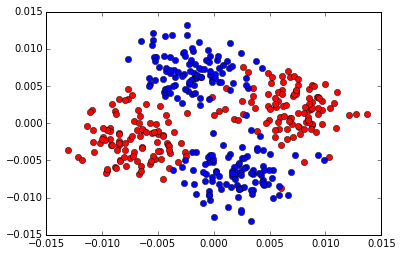

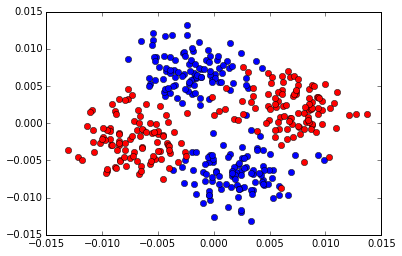

------------------------------------------3 4---------------


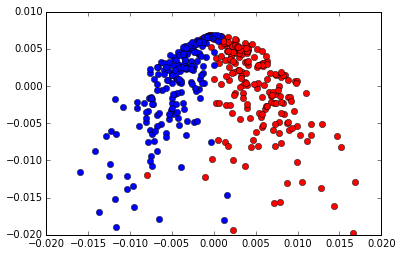

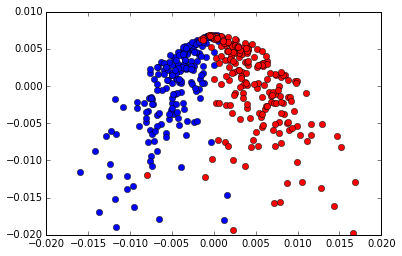

------------------------------------------5 6---------------


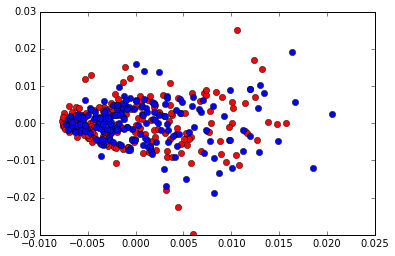

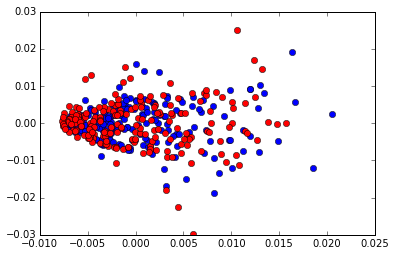

======================================================================= 20
400 40
------------------------------------------1 2---------------


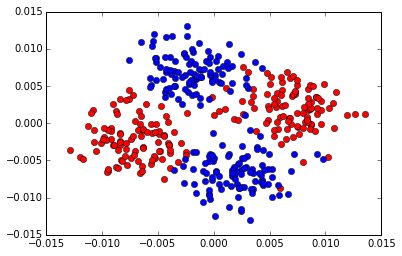

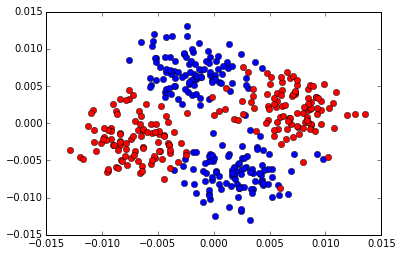

------------------------------------------3 4---------------


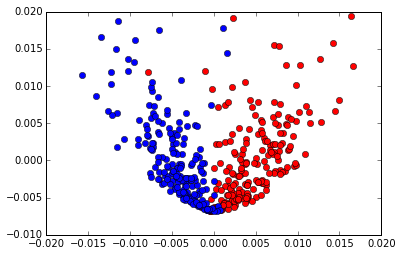

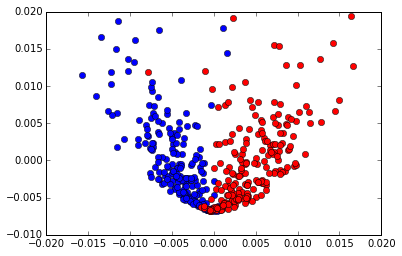

------------------------------------------5 6---------------


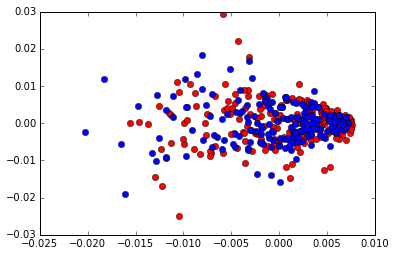

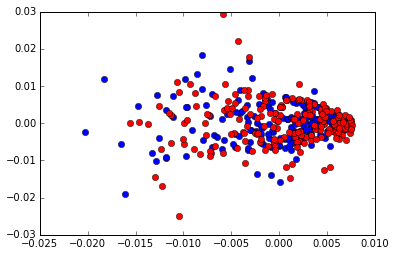

======================================================================= 25
400 40
------------------------------------------1 2---------------


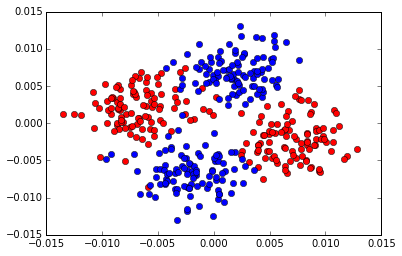

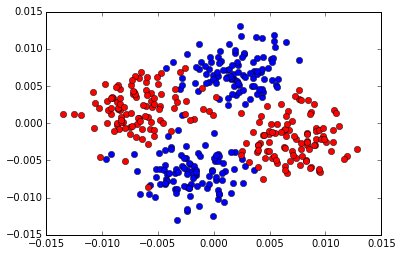

------------------------------------------3 4---------------


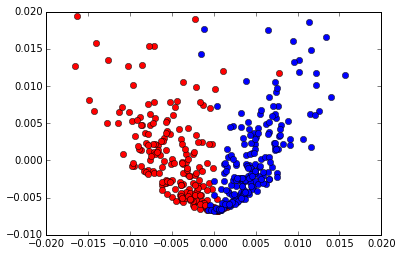

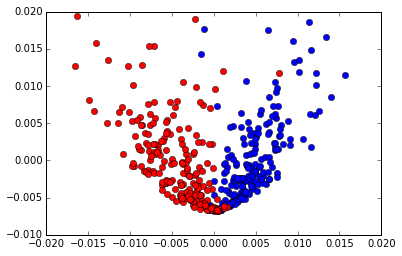

------------------------------------------5 6---------------


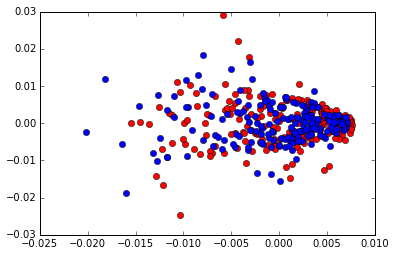

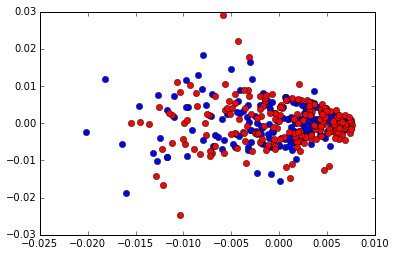

======================================================================= 30
400 40
------------------------------------------1 2---------------


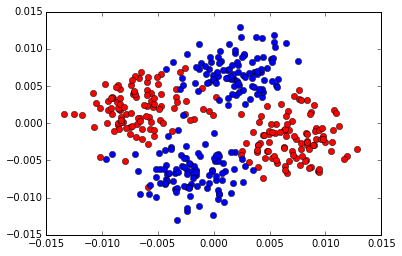

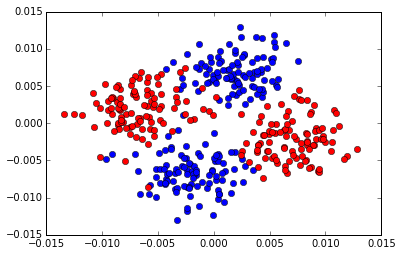

------------------------------------------3 4---------------


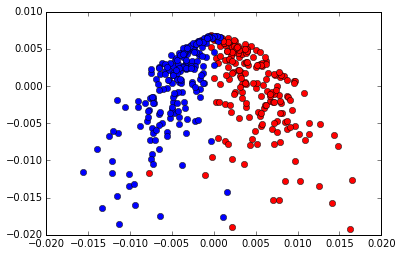

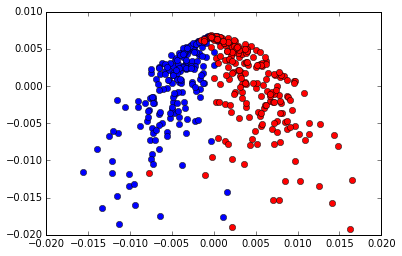

------------------------------------------5 6---------------


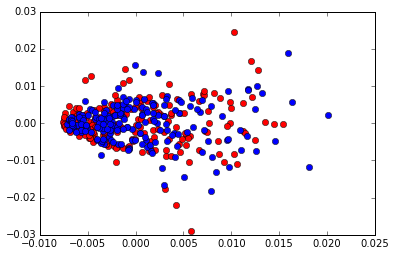

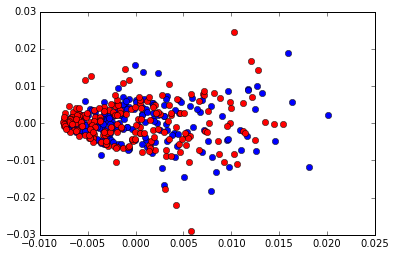

======================================================================= 35
400 40
------------------------------------------1 2---------------


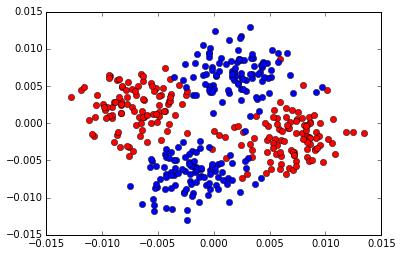

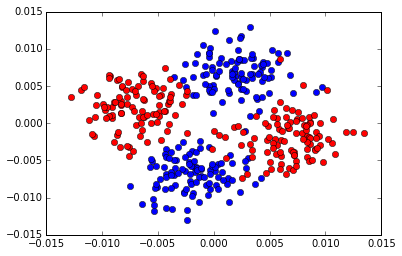

------------------------------------------3 4---------------


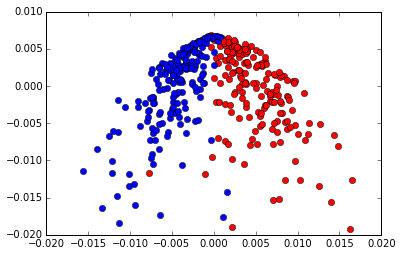

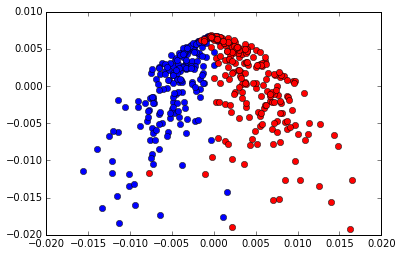

------------------------------------------5 6---------------


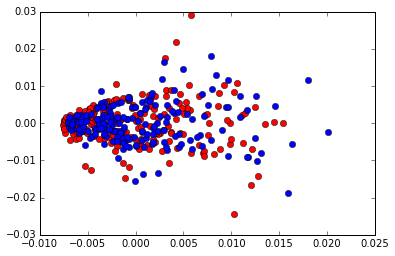

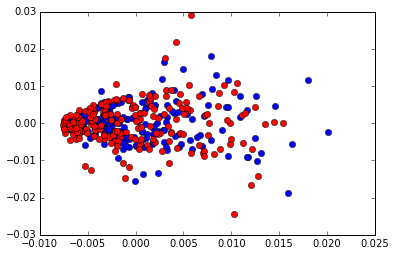

In [10]:

sigma = 20

for sigma in [.01,.02,.05,.1,.2,.5,1,2,5,10,15,20,25,30,35]:
    print '=======================================================================',sigma
    W,D,L = bipartiteUnsupervised(X,centers,sigma)
    try:
        vals, vecs = sps.linalg.eigs(L, M=D, k=7)
        vals = vals.real
        vecs = vecs.real[:numS]
        for i in xrange(1,7,2):
            print '------------------------------------------'+str(i),str(i+1)+'---------------'
            plt.plot(vecs[:,i][y==1],vecs[:,i+1][y==1],'ro')
            plt.plot(vecs[:,i][y==0],vecs[:,i+1][y==0],'bo')
            plt.show()
            plt.plot(vecs[:,i][y==0],vecs[:,i+1][y==0],'bo')
            plt.plot(vecs[:,i][y==1],vecs[:,i+1][y==1],'ro')
            plt.show()
    except Exception as e:
        print e

In [ ]:
from sklearn import neighbors
kf = KFold(numS,n_folds=10,shuffle=True)

Means = np.zeros(20)
for sigma in xrange(1,20):
    acc = []
    for train_index,test_index in kf:
        W,D,L = bipartiteUnsupervised(X,centers,sigma)
        vals, vecs = sps.linalg.eigs(L, M=D, k=7)
        vals = vals.real
        vecs = vecs.real[:numS]
        yTrain = y[train_index]
        yTest = y[test_index]
        newRepTrain = vecs[:,:6][train_index]
        newRepTest = vecs[:,:6][test_index]
        NN = neighbors.KNeighborsClassifier()
        NN.fit(newRepTrain,yTrain)
        XPred = NN.predict(newRepTest)
        acc.append(np.sum(XPred==yTest)*1.0/yTest.shape[0])
    print "sigma is:",sigma," ,accuracy:",acc
    print "Mean:", np.mean(acc), "std:",np.std(acc)
    Means[sigma-1] = np.mean(acc)

(20L,)


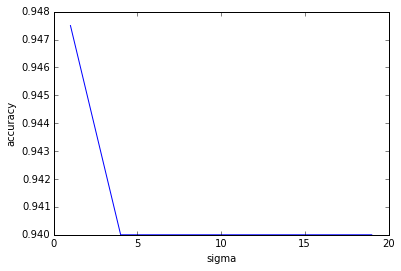

In [12]:
print Means.shape
plt.plot(range(1,20),Means[:19])
plt.xlabel('sigma')
plt.ylabel('accuracy')

In [87]:
# wine  -------------------------------------------------------------------------------------------------
def loadWine():
    wineData = pd.read_csv('data/wine.data',header=None)
    wineY = wineData[0].apply(lambda x: x-1).values
    wineX = wineData.drop(0,axis=1)
    wineX = wineX.values
    return wineX,wineY

# wine  -------------------------------------------------------------------------------------------------
def loadWineNorm():
    wineData = pd.read_csv('data/wine.data',header=None)
    wineY = wineData[0].apply(lambda x: x-1).values
    wineX = wineData.drop(0,axis=1)
    wineX = wineX.values
    wineX = (wineX - wineX.mean(axis=0))/(wineX.max(axis=0)-wineX.min(axis=0))
    return wineX,wineY

# glass  -------------------------------------------------------------------------------------------------
def loadGlass():
    glassData = pd.read_csv('data/glass.data',header=None)
    glassY = glassData[10].apply(lambda x: x-1 if x<4 else x-2).values
    glassX = glassData.drop([0,10],axis=1)
    glassX = glassX.values
    return glassX,glassY
    
# sonar  -------------------------------------------------------------------------------------------------
def loadSonar():
    sonarData = pd.read_csv('data/sonar.data',header=None)
    sonarY = (sonarData[60].apply(lambda x: 0 if x=='M' else 1)).values
    sonarX = sonarData.drop(60,axis=1)
    sonarX = sonarX.values
    return sonarX,sonarY

# iris  -------------------------------------------------------------------------------------------------
def irisLableSet(name):
    names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    for i in xrange(3):
        if names[i] == name:
            return i
def loadIris():
    irisData = pd.read_csv('data/iris.data',header=None)
    irisY = irisData[4].apply(irisLableSet).values
    irisX = irisData.drop(4,axis=1)
    irisX = irisX.values
    return irisX,irisY
    
# mnist   -------------------------------------------------------------------------------------------------
import scipy.io
def loadMnist():
    mnist = scipy.io.loadmat('data/mnistAll.mat')
    trains = []
    labels = []
    tests = []
    for i in range(10):
        trains.append(mnist['train'+str(i)])
        num = mnist['train'+str(i)].shape[0]
        labels.append(i*np.ones(num,dtype=int))
    mnistX = np.concatenate(trains)
    mnistY = np.concatenate(labels)
    return mnistX,mnistY
    
# breast cancer  -------------------------------------------------------------------------------------------------
def loadWdbc():
    wdbcData = pd.read_csv('data/wdbc.data',header=None)
    wdbcY = (wdbcData[1].apply(lambda x: 0 if x=='M' else 1)).values
    wdbcX = wdbcData.drop([0,1],axis=1)
    wdbcX = wdbcX.values
    return wdbcX,wdbcY

# usps   -------------------------------------------------------------------------------------------------
def loadUsps():
    with open('data/usps/usps_train.jf','r') as f:
        i = 0
        lines = f.readlines()
        uspsX = np.zeros((len(lines),256))
        uspsY = np.zeros(len(lines),dtype=int)
        for line in lines:
            splitedLine = line.split()
            features = map(float,splitedLine[1:])
            uspsY[i] = int(splitedLine[0])
            for j in xrange(256):
                uspsX[i,j] = features[j]
            i += 1
    return uspsX,uspsY

# waveform  -------------------------------------------------------------------------------------------------
def loadWaveform():
    waveformData = pd.read_csv('data/waveForm/waveform.data',header=None)
    waveformY = waveformData[21].values
    waveformX = waveformData.drop(21,axis=1)
    waveformX = waveformX.values
    return waveformX,waveformY   

In [83]:
def unsupervised10Fold(X,y,numP,sigma):
#     numP = 40
    numS = X.shape[0]
    centers = Prototyping(X,numP)
    acc = []
    kf = KFold(numS,n_folds=10,shuffle=True)
    i = 0
    for train_index,test_index in kf:
        W,D,L = bipartiteUnsupervised(X,centers,sigma)
        vals, vecs = sps.linalg.eigs(L, M=D, k=7)
        vals = vals.real
        vecs = vecs.real[:numS]
        yTrain = y[train_index]
        yTest = y[test_index]
        newRepTrain = vecs[:,1:7][train_index]
        newRepTest = vecs[:,1:7][test_index]
        NN = neighbors.KNeighborsClassifier(n_neighbors=2)
        NN.fit(newRepTrain,yTrain)
        XPred = NN.predict(newRepTest)
        acc.append(np.sum(XPred==yTest)*1.0/yTest.shape[0])
#         print i,":",acc[i]
        i += 1
    return np.mean(acc),np.std(acc)

In [84]:
X,y,name = generateXOR()
for numP in xrange(10,41,10):
    print '-----------------------------------------------------numP:',numP
    t = unsupervised10Fold(X,y,numP,1)
    print "accuracy:",t
# supervised10FoldRepresentation(X,y,sigma)

-----------------------------------------------------numP: 10
accuracy: (0.92749999999999999, 0.042499999999999996)
-----------------------------------------------------numP: 20
accuracy: (0.93000000000000005, 0.038405728739343024)
-----------------------------------------------------numP: 30
accuracy: (0.91500000000000004, 0.040620192023179791)
-----------------------------------------------------numP: 40
accuracy: (0.92999999999999994, 0.02915475947422648)


In [85]:
def runP(X,Y):
    Means = np.zeros(20)
    for numP in xrange(20,61,5):
        print wineX.shape
        Means[numP/5-4] = unsupervised10Fold(X,Y,numP,2)
        # supervised10FoldRepresentation(wineX,wineY,1)
    return Means

def runSigma(X,Y,sigmas):
    Means = np.zeros(len(sigmas))
    Stds = np.zeros(len(sigmas))
    numP = 30
    idx = 0
    for sigma in sigmas:
#         print '--------------------------------------- sigma: ',sigma
        try:
            Means[idx],Stds[idx] = unsupervised10Fold(X,Y,numP,sigma)
        except Exception as e:
            print e
        idx += 1
#         Means[idx] = supervised10FoldRepresentation(wineX,wineY,1)
    return Means,Stds

In [88]:
def run10Fold(X,y,sigmas):
    result = []
    resultStd = []
    for i in xrange(10):
        Means,Stds = runSigma(X,y,sigmas)
        result.append(Means.max())
        resultStd.append(Stds[Means.argmax()])
        print i , Means.max(),Stds[Means.argmax()]
    return result,resultStd

In [89]:
sigmas = [10,15,20,25,30,35,40,45,50,55,60,65,70,75]
wineX,wineY = loadWineNorm()
wineResult,wineResultStd = run10Fold(wineX,wineY,sigmas)

0 0.949346405229 0.047046340029
1 0.95522875817 0.0334564559393
2 0.949019607843 0.077914966613
3 0.938888888889 0.0763762615826
4 0.938888888889 0.0803157349711
5 0.95522875817 0.0485170314967
6 0.942810457516 0.0582075592502
7 0.949673202614 0.0631353603959
8 0.954901960784 0.054582012016
9 0.944117647059 0.0430443146145


In [90]:
print wineResult
print wineResultStd

[0.94934640522875813, 0.95522875816993458, 0.94901960784313721, 0.93888888888888888, 0.93888888888888888, 0.95522875816993458, 0.94281045751633985, 0.94967320261437904, 0.95490196078431366, 0.94411764705882351]
[0.047046340029045668, 0.033456455939284119, 0.077914966612962849, 0.076376261582597318, 0.080315734971116451, 0.048517031496700475, 0.058207559250185885, 0.063135360395939547, 0.054582012015981604, 0.043044314614512004]


In [91]:
sigmas = [.001,.01,.02,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
irisX,irisY = loadIris()
irisResult,irisResultStd = run10Fold(irisX,irisY,sigmas)

Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (1801 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
ARPACK error -1: No convergence (1801 iterations, 4/7 eigenvectors converged)
0 0.973333333333 0.0326598632371
Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (1801 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
ARPACK error -1: No convergence (1801 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
1 0.973333333333 0.0326598632371
Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (1801 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (1801 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to su

In [92]:
irisResult,irisResultStd

([0.97333333333333338,
  0.97333333333333338,
  0.96666666666666679,
  0.96666666666666679,
  0.96666666666666679,
  0.98000000000000009,
  0.95333333333333337,
  0.98000000000000009,
  0.97333333333333338,
  0.96666666666666679],
 [0.032659863237109038,
  0.032659863237109038,
  0.044721359549995787,
  0.044721359549995787,
  0.044721359549995787,
  0.030550504633038926,
  0.042687494916218982,
  0.030550504633038926,
  0.044221663871405317,
  0.044721359549995787])

In [93]:
sigmas = [.5,.8,1,2,3,4,5,8,10,15,20,25,30,35]
glassX,glassY = loadGlass()
glassResult,glassResultStd = run10Fold(glassX,glassY,sigmas)

ARPACK error -1: No convergence (2441 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
0 0.668398268398 0.084231122692
ARPACK error -1: No convergence (2441 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
1 0.673593073593 0.0992645506829
ARPACK error -1: No convergence (2441 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
2 0.677056277056 0.0934894565207
ARPACK error -1: No convergence (2441 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
3 0.667965367965 0.125164384705
ARPACK error -1: No convergence (2441 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
4 0.674025974026 0.100928022724
ARPACK error -1: No convergence (2441 itera

In [94]:
glassResult,glassResultStd

([0.66839826839826844,
  0.67359307359307363,
  0.67705627705627713,
  0.66796536796536798,
  0.67402597402597408,
  0.67835497835497838,
  0.67792207792207793,
  0.67251082251082261,
  0.67164502164502171,
  0.67142857142857149],
 [0.084231122691953736,
  0.099264550682920991,
  0.093489456520712652,
  0.12516438470503793,
  0.10092802272352983,
  0.10630857134057149,
  0.088532107575163402,
  0.066546034109084093,
  0.13004335489187399,
  0.096284102330226121])

In [95]:
sigmas = [10,11,12,15,20,21,22,23,24,25,26,27,28,29,30,35]
wdbcX,wdbcY = loadWdbc()
wdbcResult,wdbcResultStd = run10Fold(wdbcX,wdbcY,sigmas)

ARPACK error -1: No convergence (5991 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (5991 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
ARPACK error -1: No convergence (5991 iterations, 5/7 eigenvectors converged)
ARPACK error -1: No convergence (5991 iterations, 4/7 eigenvectors converged)
ARPACK error -1: No convergence (5991 iterations, 6/7 eigenvectors converged)
0 0.885620300752 0.0555624263579
ARPACK error -1: No convergence (5991 iterations, 5/7 eigenvectors converged)
ARPACK error -1: No convergence (5991 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (5991 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (5991 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
ARPACK error -1: No convergence (5991 iterations, 5/7 eigenvectors converged)
1 0.88048245614 0.0525332

In [96]:
wdbcResult,wdbcResultStd

([0.8856203007518797,
  0.88048245614035081,
  0.88574561403508767,
  0.88587092731829564,
  0.88226817042606509,
  0.87177318295739359,
  0.87506265664160399,
  0.88749999999999996,
  0.89088345864661656,
  0.89636591478696737],
 [0.055562426357937816,
  0.052533259774920266,
  0.040251235669414437,
  0.035143632165063068,
  0.025998278485904153,
  0.060696800441595214,
  0.045425157712827138,
  0.025158202119534498,
  0.041338203050273976,
  0.043199652906518227])

In [100]:
# sigmas = [1,2,5,10,15,20,24,30,35]
# uspsX,uspsY = loadUsps()
# uspsResult,uspsResultStd = run10Fold(uspsX,uspsY,sigmas)
uspsResultStd = [0.0138733106762,.0125098424437,
         0.0156577174213, 0.0157205293285,
         0.0098564763582, 0.0135094105704,
         0.00913332458321,0.0142158233636,
         0.0138485312521]
    
uspsResult = [0.840759907548,0.849678110378,
            0.837880188662,0.840900088318,
            0.841448409343,0.840213089802,
            0.841448973073,0.84185542214, 
            0.841450100532]

In [101]:
uspsResult,uspsResultStd

([0.840759907548,
  0.849678110378,
  0.837880188662,
  0.840900088318,
  0.841448409343,
  0.840213089802,
  0.841448973073,
  0.84185542214,
  0.841450100532],
 [0.0138733106762,
  0.0125098424437,
  0.0156577174213,
  0.0157205293285,
  0.0098564763582,
  0.0135094105704,
  0.00913332458321,
  0.0142158233636,
  0.0138485312521])

In [102]:
sigmas = [.2,.5,.6,.7,.8,.9,1,1.1,1.2,1.5,2,2.5,3,4,5,7,8,10]
waveformX,waveformY= loadWaveform()
waveformResult,waveformResultStd = run10Fold(waveformX,waveformY,sigmas)

ARPACK error -1: No convergence (50301 iterations, 3/7 eigenvectors converged)
0 0.8244 0.0155640611667
ARPACK error -1: No convergence (50301 iterations, 1/7 eigenvectors converged)
1 0.8122 0.0226883229878
ARPACK error -1: No convergence (50301 iterations, 3/7 eigenvectors converged)
2 0.8178 0.0143234074158
ARPACK error -1: No convergence (50301 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
3 0.814 0.0142828568571
ARPACK error -1: No convergence (50301 iterations, 1/7 eigenvectors converged)
4 0.8182 0.022582293949
ARPACK error -1: No convergence (50301 iterations, 1/7 eigenvectors converged)
5 0.8182 0.0157340395322
ARPACK error -1: No convergence (50301 iterations, 2/7 eigenvectors converged)
6 0.8194 0.0157238672088
ARPACK error -1: No convergence (50301 iterations, 4/7 eigenvectors converged)
7 0.816 0.0196977156036
ARPACK error -1: No convergence (50301 iterations, 1/7 eigenvectors converged)
8 0.815 0.0

In [103]:
waveformResult,waveformResultStd

([0.82440000000000002,
  0.81220000000000003,
  0.81779999999999986,
  0.81400000000000006,
  0.81819999999999982,
  0.81820000000000004,
  0.81939999999999991,
  0.81600000000000006,
  0.81499999999999984,
  0.82200000000000006],
 [0.015564061166674954,
  0.022688322987827882,
  0.014323407415835083,
  0.014282856857085666,
  0.022582293949021195,
  0.015734039532173519,
  0.01572386720880074,
  0.019697715603592188,
  0.015754364474646357,
  0.027683930356797226])

In [104]:
sigmas = [2,3,4,4.1,4.2,4.5,4.8,5,5.1,5.2,5.5,5.8,6,7,8,10]
sonarX,sonarY= loadSonar()
sonarResult,sonarResultStd = run10Fold(sonarX,sonarY,sigmas)

0 0.817619047619 0.0787674322929
1 0.817380952381 0.0789532569312
2 0.812380952381 0.0726077274549
3 0.812619047619 0.101161340343
4 0.82619047619 0.0879406623281
5 0.816428571429 0.100871767005
6 0.827857142857 0.0794400043159
7 0.827380952381 0.0882383008247
8 0.831904761905 0.0955186344323
9 0.827380952381 0.0637566411996


In [105]:
sonarResult,sonarResultStd

([0.81761904761904758,
  0.81738095238095243,
  0.81238095238095231,
  0.81261904761904769,
  0.82619047619047625,
  0.81642857142857128,
  0.82785714285714285,
  0.82738095238095233,
  0.83190476190476181,
  0.82738095238095233],
 [0.078767432292938658,
  0.078953256931208027,
  0.072607727454919016,
  0.1011613403432623,
  0.087940662328088878,
  0.10087176700487012,
  0.079440004315925655,
  0.088238300824677623,
  0.095518634432290361,
  0.06375664119958134])

In [106]:
sigmas = [1,2,5,10,15,20,24,30,35]
moonX,moonY, tmp = generateTwoParabola()
moonResult,moonResultStd = run10Fold(moonX,moonY,sigmas)

0 1.0 0.0
1 1.0 0.0
2 1.0 0.0
3 1.0 0.0
4 1.0 0.0
5 1.0 0.0
6 1.0 0.0
7 1.0 0.0
8 1.0 0.0
9 1.0 0.0


In [107]:
moonResult,moonResultStd

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [108]:
def generateTwoDisks():
    angle = np.arange(0, np.pi*2, 0.15)

    r1 = 50
    r2 = 20
    size = angle.shape[0]

    x1 = r1 * np.cos(angle)
    y1 = r1 * np.sin(angle)

    x2 = r2 * np.cos(angle)
    y2 = r2 * np.sin(angle)


    EACH = 10
    X = np.zeros((2*size*EACH,2))
    Y = np.zeros(2*size*EACH)
    Y[size*EACH:] = np.ones(size*EACH)

    cov = [[5, 0], [0, 5]]  # diagonal covariance
    for i in range(size):
        X[i*EACH:(i+1)*EACH] = np.random.multivariate_normal([x1[i],y1[i]], cov, EACH)
        X[(i+size)*EACH:(i+size+1)*EACH] = np.random.multivariate_normal([x2[i],y2[i]], cov, EACH)
    return X,Y,"Disks"

In [109]:
sigmas = [1,2,5,10,15,20,24,30,35]
diskX,diskY,tmp = generateTwoDisks()
diskResult,diskResultStd = run10Fold(diskX,diskY,sigmas)

ARPACK error -1: No convergence (8701 iterations, 5/7 eigenvectors converged)
0 1.0 0.0
ARPACK error -1: No convergence (8701 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (8701 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
1 1.0 0.0
2 1.0 0.0
ARPACK error -1: No convergence (8701 iterations, 6/7 eigenvectors converged)
3 1.0 0.0
ARPACK error -1: No convergence (8701 iterations, 5/7 eigenvectors converged)
4 1.0 0.0
ARPACK error -1: No convergence (8701 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (8701 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
5 1.0 0.0
6 1.0 0.0
7 1.0 0.0
ARPACK error -1: No convergence (8701 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (8701 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues 

In [110]:
diskResult,diskResultStd

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [111]:
sigmas = [0.01,.02,.05,.1,.2,.5,1,2,5]
xorX,xorY,tmp = generateXOR()
xorResult,xorResultStd = run10Fold(xorX,xorY,sigmas)

Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (4301 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
0 0.92 0.0331662479036
Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (4301 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
1 0.9175 0.0388104367407
Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (4301 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
2 0.91 0.0514781507049
Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (4301 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
3 0.92 0.031224989992
Factor is exactly singular
Factor is exactly singular
A

In [112]:
xorResult,xorResultStd

([0.92000000000000015,
  0.91750000000000009,
  0.90999999999999992,
  0.92000000000000015,
  0.92500000000000004,
  0.92500000000000004,
  0.91000000000000014,
  0.91750000000000009,
  0.9225000000000001,
  0.91500000000000004],
 [0.033166247903553998,
  0.038810436740650059,
  0.051478150704935006,
  0.03122498999199199,
  0.035355339059327362,
  0.048733971724044818,
  0.03201562118716425,
  0.031721443851123785,
  0.037831864876053875,
  0.050249378105604453])

In [113]:
import scipy.io as io
def generateConcentric():
    concentric = io.loadmat("Concentric_rings.mat")
    X = concentric['X'][:,[0,1]]
    Y = concentric['Y'][:,0]
    Y = (Y==1)
    return X,Y,"Concentric"

In [114]:
sigmas = [0.01,.02,.05,.1,.2,.5,1,2,5,10]
concentricX,concentricY,tmp = generateConcentric()
concentricResult,concentricResultStd = run10Fold(concentricX,concentricY,sigmas)

Factor is exactly singular
ARPACK error -1: No convergence (3431 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
0 0.971370967742 0.0222423901682
Factor is exactly singular
ARPACK error -1: No convergence (3431 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
1 0.967943548387 0.0320615232344
Factor is exactly singular
ARPACK error -1: No convergence (3431 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
2 0.961995967742 0.0389537051549
Factor is exactly singular
ARPACK error -1: No convergence (3431 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
3 0.974495967742 0.0313443230512
Factor is exactly singular
ARPACK error -1: No convergence (3431 iterations, 0/7 eigenvectors converged) [ARPACK error -14: 

In [115]:
concentricResult,concentricResultStd

([0.97137096774193554,
  0.96794354838709684,
  0.96199596774193563,
  0.97449596774193559,
  0.96824596774193561,
  0.96794354838709684,
  0.96491935483870961,
  0.96804435483870965,
  0.96804435483870976,
  0.9648185483870968],
 [0.022242390168222072,
  0.032061523234437624,
  0.038953705154854829,
  0.031344323051216504,
  0.019770661307026875,
  0.032260584578983259,
  0.029842115106457449,
  0.020090854785692207,
  0.028633468817984127,
  0.022343813103430695])

In [79]:
sigmas = [.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,1]
wineXN,wineYN = loadWineNorm()
wineMeansN = runSigma(wineXN,wineYN,sigmas)

ARPACK error -1: No convergence (2081 iterations, 2/7 eigenvectors converged)
ARPACK error -1: No convergence (2081 iterations, 4/7 eigenvectors converged)


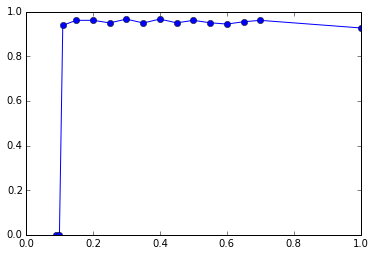

In [80]:
plt.plot(sigmas,wineMeansN,'bo-')

In [ ]:
sigmas = [10,11,12,15,20,21,22,23,24,25,26,27,28,29,30,35]
wdbcX,wdbcY = loadWdbc()
wdbcMeans = runSigma(wdbcX,wdbcY,sigmas)

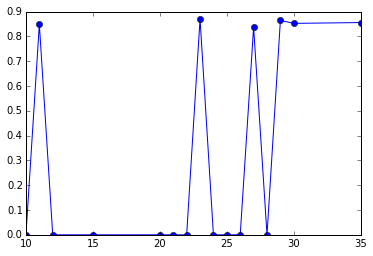

In [26]:
plt.plot(sigmas,wdbcMeans,'bo-')

In [ ]:
sigmas = [1,2,5,10,15,20,24,30,35]
uspsX,uspsY = loadUsps()
uspsMeans = runSigma(uspsX,uspsY,sigmas)

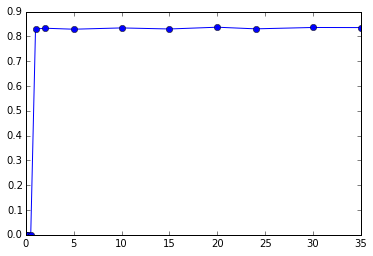

In [30]:
plt.plot(sigmas,uspsMeans,'bo-')

In [36]:
sigmas = [.1,.2,.5,1,2,5,10,15,20,24,30,35]
waveformX,waveformY= loadWaveform()
waveformMeans = runSigma(waveformX,waveformY,sigmas)

Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (50301 iterations, 6/7 eigenvectors converged)


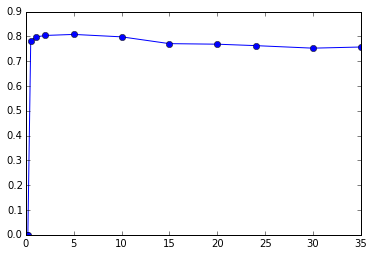

In [37]:
plt.plot(sigmas,waveformMeans,'bo-')

In [39]:
sigmas = [0.01,.02,.05,.1,.2,.5,1,2,5,10,15,20,24,30,35]
sonarX,sonarY= loadSonar()
sonarMeans = runSigma(sonarX,sonarY,sigmas)

Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (2381 iterations, 1/7 eigenvectors converged)
ARPACK error -1: No convergence (2381 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]


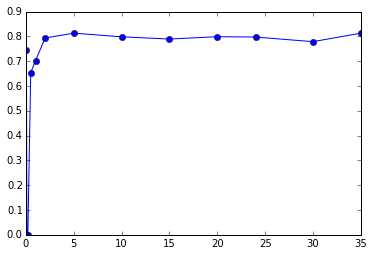

In [41]:
plt.plot(sigmas,sonarMeans,'bo-')

In [53]:
sigmas = [0.01,.02,.05,.1,.2,.5,1,2,5,10,15,20,24,30,35]
moonX,moonY, tmp = generateTwoParabola()
moonMeans = runSigma(moonX,moonY,sigmas)

Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (8301 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (8301 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]


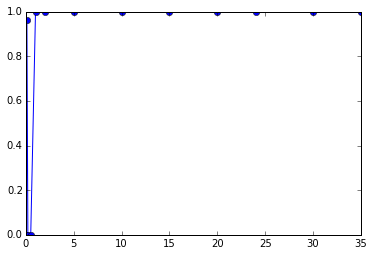

In [54]:
plt.plot(sigmas,moonMeans,'bo-')

In [56]:
sigmas = [0.01,.02,.05,.1,.2,.5,1,2,5,10,15,20,24,30,35]
diskX,diskY,tmp = generateTwoDisks()
diskMeans = runSigma(diskX,diskY,sigmas)

Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular
Factor is exactly singular


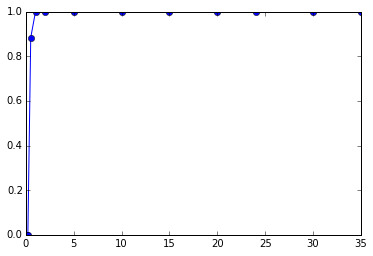

In [57]:
plt.plot(sigmas,diskMeans,'bo-')

In [60]:
sigmas = [0.01,.02,.05,.1,.2,.5,1,2,5,10,15,20,24,30,35]
xorX,xorY,tmp = generateXOR()
xorMeans = runSigma(xorX,xorY,sigmas)

Factor is exactly singular
Factor is exactly singular
ARPACK error -1: No convergence (4301 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]


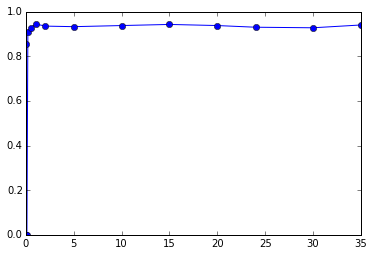

In [61]:
plt.plot(sigmas,xorMeans,'bo-')

In [72]:
sigmas = [0.01,.02,.05,.1,.2,.5,1,2,5,10]
concentricX,concentricY,tmp = generateConcentric()
concentricMeans = runSigma(concentricX,concentricY,sigmas)
plt.plot(sigmas,concentricMeans,'bo-')

Factor is exactly singular
ARPACK error -1: No convergence (3431 iterations, 0/7 eigenvectors converged) [ARPACK error -14: DNAUPD  did not find any eigenvalues to sufficient accuracy.]
ARPACK error -1: No convergence (3431 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (3431 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (3431 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (3431 iterations, 6/7 eigenvectors converged)
ARPACK error -1: No convergence (3431 iterations, 6/7 eigenvectors converged)
